<a href="https://colab.research.google.com/github/rudeboybert/SDS390/blob/master/PS/PS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 02

Instructions:
1. Name: Christy Yang
1. Create a new ChatGPT chat called "SDS390 PS02" that contains all the prompts you used for this problem set, click the share button, and paste the URL in Markdown format [here](https://www.smith.edu/)

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and explore data
1. Load the CSV data of biweekly dendroband measures for tree with tag 82203
1. Look at the raw data (rows and variables) and meta-data as Amir always told me to do
1. Note that DBH is the only non-index variable we will work with, thus simplify the data frame to only have this variable
1. Plot the time series of DBH (diameter at breast height, in mm) as we've done numerous times in DataCamp: just using `.plot()` with no arguments
1. Now plot the time series where each of the 147 observed data point is marked with a dot. In other words, your plot should at the very least have these [points](https://github.com/rudeboybert/SDS390/blob/master/PS/tag_82203_plot.pdf).
1. What is the difference in information presented between the two plots? 
1. Describe any patterns you observe in the time series where each observed data point is marked with a dot

6.The 'Time Series of DBH with Observed Points' is a scatter plot that displays the actual data points of the DBH measurements. Each individual data point corresponds directly to an exact value recorded in the data table. This plot provides the precise discrete observations.

In contrast, the 'Time Series of DBH' connects these data points with a continuous line, creating a line graph that illustrates the trends and variations in DBH over time. This line line graph offers a smoother and continuous view of how DBH values, better for the observation of trends and patterns in the data.

7.The plot as a whole reveals a consistent and upward trend in DBH (Diameter at Breast Height) from 2010 to 2020, which aligns with the natural growth pattern of trees. Additionally, the plot illustrates the influence of seasonal variation on DBH. DBH experiences a rapid increase during the second and third quarters of each year. However, it is important to note that there are data gaps in the first and fourth quarters of each year, resulting in blank areas on the plot during those periods. These gaps may be due to lack of measurement practices.

RangeIndex(start=0, stop=147, step=1)
Raw data:
     tag  stemtag  survey.ID  year  month  day  intraannual    sp  measure  \
0  82203        1    2010.01  2010      1   27            1  litu    26.20   
1  82203        1    2011.01  2011      1   15            1  litu    41.10   
2  82203        1    2011.02  2011      5    9            1  litu    40.62   
3  82203        1    2011.03  2011      5   13            1  litu    40.21   
4  82203        1    2011.04  2011      5   16            1  litu    42.55   

  codes  ... status stemID  dendDiam  dbh_orig  new.band  dendroID  \
0   NaN  ...  alive  10045     610.0     611.3         1       106   
1   NaN  ...  alive  10045       NaN     611.3         0       106   
2   NaN  ...  alive  10045       NaN     611.3         0       106   
3   NaN  ...  alive  10045       NaN     611.3         0       106   
4   NaN  ...  alive  10045       NaN     611.3         0       106   

         date         dbh  scenario   data_source  
0  2010-01

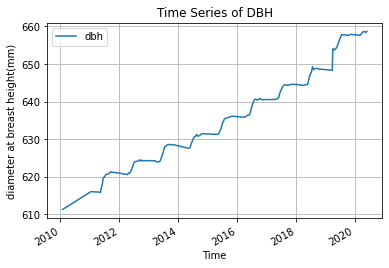

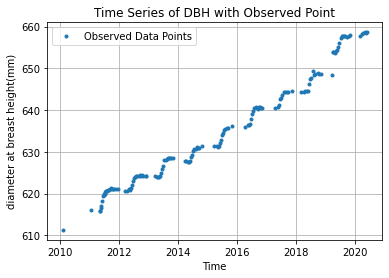

In [109]:
data = pd.read_csv("tag_82203.csv")
print(data.index)

# Inspect the data
print("Raw data:")
print(data.head())
print("Data info:")
print(data.info())
# Get metadata
metadata = data.describe()
print("Metadata data:")
print(metadata)

#Set date column as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

dbh = data['dbh']
print("dbh index")
print(dbh.index)


#Haven't explicitly set an index for the original DataFrame data, the index is a default integer-based index starting from 0 and incrementing by 1 for each row.
dbh.plot()
plt.xlabel('Time')
plt.ylabel('diameter at breast height(mm)')
plt.title('Time Series of DBH')
plt.grid(True)
plt.legend()
plt.show()


plt.plot(dbh, 'o', markersize=3,label='Observed Data Points')
plt.title("Time Series of DBH with Observed Point")
plt.xlabel("Time")
plt.ylabel("diameter at breast height(mm)")
plt.grid(True)
plt.legend()
plt.show()

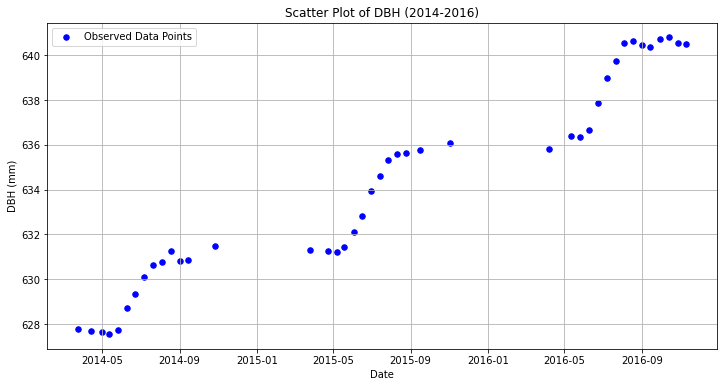

In [110]:
# Select data from the year range 2014-2016
data_2014_2016 = data['2014-01-01':'2016-12-31']

# Create a scatter plot for the 'dbh' column within the selected date range
plt.figure(figsize=(12, 6))
plt.scatter(data_2014_2016.index, data_2014_2016['dbh'], marker='o', s=30, label='Observed Data Points', color='b')
plt.title("Scatter Plot of DBH (2014-2016)")
plt.xlabel("Date")
plt.ylabel("DBH (mm)")
plt.grid(True)
plt.legend()
plt.show()

# 2. Decomposition Plots
Create a seasonal decomposition plot of this data to answer the following questions:
1. What is the approximate growth (in mm) per year trend for this tree
1. What is the approximate range in seasonal variation in growth around this trend?
1. When are the peaks and when are the valleys in this seasonal variation?
1. Are there periods of time where we might be skeptical of the above trend and seasonality?

Note: You may need to do some data transformation as seen in the first DataCamp course to get a valid plot

1. Approximate Growth (in mm) per Year Trend:4.7
   The approximate annual growth trend can be estimated by examining the 'Trend Component' plot.
  
2. Approximate Range in Seasonal Variation in Growth:[-1,1]
    The seasonal component represents the periodic fluctuations in growth. 
    Values near 1 indicate the peak of the seasonal pattern, representing periods with higher-than-average values.
    Values near -1 indicate the trough of the seasonal pattern, representing periods with lower-than-average values.
    Values near 0 indicate average value.

3. Peaks:The third quarter of each year
   Valleys:The second quarter of each year
4. Periods of skeption may be related to irregularities in the data. The residual component represents the unexplained variations in the data after accounting for the trend and seasonality. 
    The residual plot shows some remaining seasonality patterns, also called autocorrelation, it can be an indication of seasonality that hasn't been completely removed by the decomposition process. This suggests that there may be external factors or seasonal patterns that are not completely captured by the seasonal decomposition.
    It seems that the two abnormal increases in early 2011 and the first half of 2019 in the residual plot correspond to the lack of measurement at that time. 

Resample data:
date
2010-01-31    611.300000
2010-02-28    611.695832
2010-03-31    612.091663
2010-04-30    612.487495
2010-05-31    612.883327
                 ...    
2020-01-31    657.888662
2020-02-29    657.904592
2020-03-31    657.920522
2020-04-30    658.548156
2020-05-31    658.533295
Freq: M, Name: dbh, Length: 125, dtype: float64
count    113.000000
mean     633.512231
std       11.701697
min      613.674990
25%      623.943440
50%      632.240265
75%      642.794528
max      657.540481
Name: trend, dtype: float64


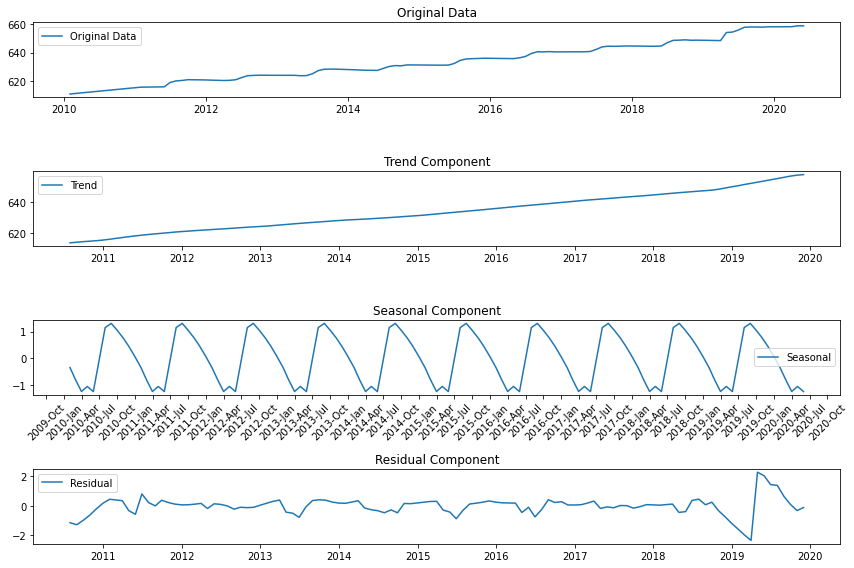

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# The seasonal_decompose does not handle missing values in the input time series data. 
# Resample the data to fill in missing monthes using forward fill to ensure having data for each month, allowing to better analyze these patterns.
data_resampled = data['dbh'].resample('M').mean().interpolate()
print("Resample data:")
print(data_resampled)
result = seasonal_decompose(data_resampled, model='additive')


trend = result.trend
seasonal = result.seasonal
residual = result.resid
print(trend.describe())

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_resampled, label='Original Data')
plt.legend()
plt.title('Original Data')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
# Format x-axis to show year and selected months (Jan, Apr, Jul, Oct)
months_to_show = [1, 4, 7, 10]  # Months to display
plt.gca().xaxis.set_major_locator(MonthLocator(bymonth=months_to_show, bymonthday=1))
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%b"))
plt.xticks(rotation=45) 

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.title('Residual Component')


plt.tight_layout()

plt.show()


In [119]:
approximate_annual_growth = (data_resampled.iloc[-1] - data_resampled.iloc[0]) /(data_resampled.index.year[-1]-data_resampled.index.year[0])
print(approximate_annual_growth)

4.723329467062672


# 3. Forecasting using an AR(2) model
In this exercise you will use an AR(2) model as seen in the second datacamp course "Time Series Analysis in Python" to forecast this tree's size exactly two years into the future. Unfortunately since we aren't covering ARIMA models until later in the course, we won't be able to:

1. Ascertain the appropriateness of using an AR(2) model. Ex: are all assumptions met?
1. Fully interpret the model output's meaning
1. Diagnose any issues. 

However, we will simply view this code as a minimally viable product that we will improve on later. Instructions:
1. Fit an appropriate AR(2) model
1. Print the summary of the result
1. Plot the TS data along with both in-sample fitted forecasts AND out-of-sample forecasts exactly two years into the future
1. Comment on the quality of the out-of-sample forecast. If you have any ideas on how to improve the forecast state them, if not no problem.

AR(2,0,0) Model parameters:
const     634.536762
ar.L1       1.406552
ar.L2      -0.407624
sigma2      0.629942

AR(2,0,2) Model parameters:
const     634.994306
ar.L1       1.575204
ar.L2      -0.576148
ma.L1      -0.195509
ma.L2      -0.018960
sigma2      0.626859

Adjust the model to let forcast value in increasing trend:
The moving average order is 2, which represents 2 lag terms of the forecast errors to include in the model. It captures past forecast errors and their influence on the current value. But the positive AIC indicated a bad fitting.(disappear after a few running...)

The out-of-sample forecast doesn't capture seasonality because the ARIMA(2,0,2) model used in this example is a simple autoregressive model that doesn't explicitly show model seasonality.To improve the forecast quality, we can experiment with different ARIMA orders or models specifically designed to capture seasonality.

                               SARIMAX Results                                
Dep. Variable:                    dbh   No. Observations:                  125
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -151.598
Date:                Tue, 24 Oct 2023   AIC                            315.196
Time:                        10:41:24   BIC                            332.166
Sample:                    01-31-2010   HQIC                           322.090
                         - 05-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        634.9943     22.538     28.174      0.000     590.821     679.168
ar.L1          1.5752      0.397      3.967      0.000       0.797       2.353
ar.L2         -0.5761      0.398     -1.449      0.1

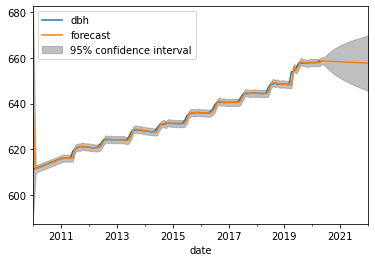

In [123]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Fit an AR(2) model
model = ARIMA(data_resampled, order=(2, 0, 2))
model_fitted = model.fit()

# Print the summary of the result
print(model_fitted.summary())
print(model_fitted.params)

fig, ax=plt.subplots()
data_resampled.plot(ax=ax)
plot_predict(model_fitted,start=0, end='2022',ax=ax)
plt.legend(loc='upper left')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                    dbh   No. Observations:                  125
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -151.911
Date:                Tue, 24 Oct 2023   AIC                            311.822
Time:                        10:41:59   BIC                            323.135
Sample:                    01-31-2010   HQIC                           316.417
                         - 05-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        634.5368     22.073     28.747      0.000     591.274     677.800
ar.L1          1.4066      0.056     25.173      0.000       1.297       1.516
ar.L2         -0.4076      0.058     -7.003      0.0

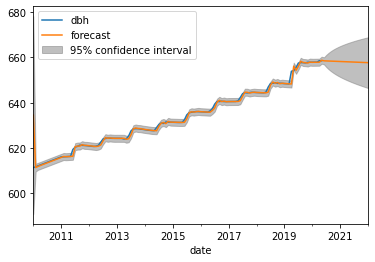

In [125]:
# Fit an AR(2) model
model2 = ARIMA(data_resampled, order=(2, 0, 0))
model2_fitted = model2.fit()

# Print the summary of the result
print(model2_fitted.summary())
print(model2_fitted.params)

fig, ax=plt.subplots()
data_resampled.plot(ax=ax)
plot_predict(model2_fitted,start=0, end='2022',ax=ax)
plt.legend(loc='upper left')
plt.show()